In [ ]:
from IPython.display import IFrame
documentation = IFrame(src='https://ipyleaflet.readthedocs.io/en/latest/', width=1000, height=600)
display(documentation)

In [ ]:
# imports
import ipyleaflet
from ipyleaflet import Map

# create map
# basic_map = ipyleaflet.Map(zoom=1)
basic_map = Map(zoom=4)

# display map
# basic_map
display(basic_map)


In [ ]:
# I have yet to find a comprehensive list of map types, however, below are several examples

import ipyleaflet
import ipywidgets
from ipyleaflet import basemaps, Map

radio_button = ipywidgets.RadioButtons(options=['Positron', 'DarkMatter', 'WorldStreetMap', 'DeLorme', 
                                                'WorldTopoMap', 'WorldImagery', 'NatGeoWorldMap', 'HikeBike', 
                                                'HyddaFull', 'Night', 'ModisTerra', 'Mapnik', 'HOT', 'OpenTopoMap', 
                                                'Toner', 'Watercolor'],
                                       value='Positron', 
                                       description='map types:')

def toggle_maps(map):
    if map == 'Positron': m = Map(zoom=2, basemap=basemaps.CartoDB.Positron)
    if map == 'DarkMatter': m = Map(zoom=1, basemap=basemaps.CartoDB.DarkMatter)
    if map == 'WorldStreetMap': m = Map(center=(40.67, -73.94), zoom=10, basemap=basemaps.Esri.WorldStreetMap)
    if map == 'DeLorme': m = Map(center=(40, -99), zoom=4, basemap=basemaps.Esri.DeLorme)
    if map == 'WorldTopoMap': m = Map(center=(40, -99), zoom=4, basemap=basemaps.Esri.WorldTopoMap)
    if map == 'WorldImagery': m = Map(center=(40, -99), zoom=4, basemap=basemaps.Esri.WorldImagery)
    if map == 'NatGeoWorldMap': m = Map(center=(40, -99), zoom=4, basemap=basemaps.Esri.NatGeoWorldMap)
    if map == 'HikeBike': m = Map(center=(39.73, -104.98), zoom=10, basemap=basemaps.HikeBike.HikeBike)
    if map == 'HyddaFull': m = Map(center=(40, -99), zoom=4, basemap=basemaps.Hydda.Full)
    if map == 'Night': m = Map(center=(40, -99), zoom=4, basemap=basemaps.NASAGIBS.ViirsEarthAtNight2012)
    if map == 'ModisTerra': m = Map(center=(40, -99), zoom=4, basemap=basemaps.NASAGIBS.ModisTerraTrueColorCR)
    if map == 'Mapnik': m = Map(center=(40, -99), zoom=4, basemap=basemaps.OpenStreetMap.Mapnik)
    if map == 'HOT': m = Map(center=(40, -99), zoom=4, basemap=basemaps.OpenStreetMap.HOT)
    if map == 'OpenTopoMap': m = Map(center=(40, -99), zoom=4, basemap=basemaps.OpenTopoMap)
    if map == 'Toner': m = Map(center=(40, -99), zoom=4, basemap=basemaps.Stamen.Toner)
    if map == 'Watercolor': m = Map(center=(40, -99), zoom=4, basemap=basemaps.Stamen.Watercolor)
    display(m)
        
ipywidgets.interact(toggle_maps, map=radio_button)

In [ ]:
from ipyleaflet import Map, Marker
# install geocoder first from python.org python package index
import geocoder

# location address
location = geocoder.osm('2920 Zoo Dr, San Diego, CA 92101')

# to view location details use location.json

# latitude and longitude of location
latlng = [location.lat, location.lng]

# create map
san_diego_zoo_map = Map(center=latlng)

# marker
marker = Marker(location=latlng, title='2920 Zoo Dr, San Diego, CA 92101')
san_diego_zoo_map.add_layer(marker)

# display map
san_diego_zoo_map

In [ ]:
import ipyleaflet
from ipyleaflet import DrawControl

# create map
draw_control_map = ipyleaflet.Map(zoom=1)

# create control
draw_control = DrawControl()

# add control to map
draw_control_map.add_control(draw_control)

# add extra options to control
draw_control.circle = {
    "shapeOptions": {
        "fillColor": "blue",
        "color": "blue",
        "fillOpacity": 0.5
    }
}

draw_control.rectangle = {
    "shapeOptions": {
        "fillColor": "blue",
        "color": "blue",
        "fillOpacity": 0.5
    }
}

# display map
draw_control_map

In [6]:
import geocoder
import ipyleaflet
from ipyleaflet import Map, WidgetControl
import ipywidgets

# get location data for large cities (latitude and longitude)
new_york_city = geocoder.osm('New York City, New York')
los_angeles = geocoder.osm('Los Angeles, California')
chicago = geocoder.osm('Chicago, Illinois')
houston = geocoder.osm('Houston, Texas')
phoenix = geocoder.osm('Phoenix, Arizona')
philadelphia = geocoder.osm('Philadelphia, Pennsylvania')
san_antonio = geocoder.osm('San Antonio, Texas')
san_diego = geocoder.osm('San Diego, California')
dallas = geocoder.osm('Dallas, Texas')
san_jose = geocoder.osm('San Jose, California')

# create latitude, longitude, intensity for heat map
# intensity is population scaled down so heat dots are more readable
new_york_city_latlng = [new_york_city.lat, new_york_city.lng, 8398748/1000]
los_angeles_latlng = [los_angeles.lat, los_angeles.lng, 3990456/1000]
chicago_latlng = [chicago.lat, chicago.lng, 2705994/1000]
houston_latlng = [houston.lat, houston.lng, 2325502/1000]
phoenix_latlng = [phoenix.lat, phoenix.lng, 1660272/1000]
philadelphia_latlng = [philadelphia.lat, philadelphia.lng, 1584138/1000]
san_antonio_latlng = [san_antonio.lat, san_antonio.lng, 1532233/1000]
san_diego_latlng = [san_diego.lat, san_diego.lng, 1425976/1000]
dallas_latlng = [dallas.lat, dallas.lng, 1345047/1000]
san_jose_latlng = [san_jose.lat, san_jose.lng, 1030119/1000]

# create list of cities with latitude, longitude, intensity
large_cities = [new_york_city_latlng, los_angeles_latlng, chicago_latlng, houston_latlng, phoenix_latlng, 
                philadelphia_latlng, san_antonio_latlng, san_diego_latlng, dallas_latlng, san_jose_latlng]

# slider widget to control heatmap radius
radius_slider = ipywidgets.IntSlider(value=10,
                                  min=1,
                                  max=50,
                                  step=1,
                                  description='Radius:',
                                  disabled=False,
                                  continuous_update=False,
                                  orientation='horizontal',
                                  readout=True,
                                  readout_format='d')

def resize_radius(radius_size):
    # create map
    cities_heatmap = Map(center=(40, -99), zoom=4)
    
    # create heatmap layer
    heatmap_layer = ipyleaflet.Heatmap(locations=large_cities, radius=radius_size, blur=20)
    
    # add heatmap layer to map
    cities_heatmap.add_layer(heatmap_layer)
    
    # display map
    display(cities_heatmap)
    
ipywidgets.interact(resize_radius, radius_size=radius_slider)

interactive(children=(IntSlider(value=10, continuous_update=False, description='Radius:', max=50, min=1), Outp…

<function __main__.resize_radius(radius_size)>

In [ ]:
import plotly.express as px
xs = range(0,int(CR),10)
trajM = ElasticNet()
tPoints = pd.DataFrame({'Ranges':[0,.57*CR,.58*CR,CR],'Alts':[0,MO,MO,0]})
trajM.fit(tPoints[['Ranges']],tPoints['Alts'])
ys = trajM.predict(xs)
tPoints = pd.DataFrame({'Ranges':xs,'Alts':ys})
fig = px.scatter(tPoints, x='Ranges', y='Alts')
fig.update_layout(autosize=False,width=800,height=MO/rng*800*1.5)

y = 3.25444 * x + -0.01170 * x^2 + -155.02799


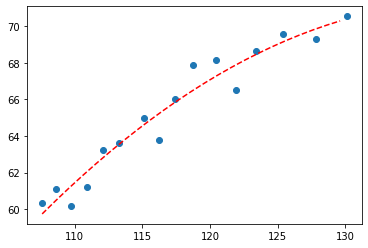

In [1]:
# define the true objective function
def objective(x, a, b, c):
	return a * x + b * x**2 + c

# fit a second degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

# define the true objective function
def objective(x, a, b, c):
	return a * x + b * x**2 + c

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
# choose the input and output variables
x, y = data[:, 4], data[:, -1]
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

y = -0.00000 + 0.51897 * x + -0.00000 * x^2 + -0.00000 * x^3


C:\Users\harmk\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


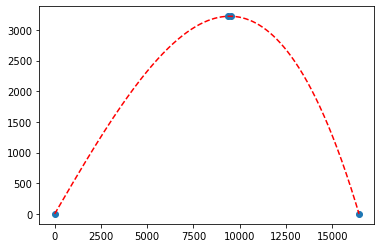

In [4]:
# define the true objective function
def objective(x, a, b, c, d):
	return a + b*x + c*x**2 + d*x**3

# fit a second degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
import pandas as pd

# load the dataset
CR = 16450
MO = 3224
tPoints = pd.DataFrame({'Ranges':[0,.57*CR,.58*CR,CR],'Alts':[0,MO,MO,0]})
# choose the input and output variables
x, y = tPoints['Ranges'], tPoints['Alts']
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c, d = popt
print('y = %.5f + %.5f * x + %.5f * x^2 + %.5f * x^3' % (a, b, c, d))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()